<a href="https://colab.research.google.com/github/latifahnl/modulesection/blob/kmmodule/Autoencoder_for_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

### Data Preparation

In [ ]:
#load dataset mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
xtrain = xtrain / 255
xtest = xtest / 255

In [ ]:
print(xtrain.shape)
print(xtest.shape)

xtrain = xtrain.reshape(60000, 28*28)
xtest = xtest.reshape(10000, 28*28)

print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


### Modelling

In [ ]:
# Encode Layer
input_layer = layers.Input(shape=(784,))

dense1 = layers.Dense(128, activation="relu")(input_layer)
dense2 = layers.Dense(64, activation="relu")(dense1)

In [ ]:
# Decode Layer

dense3 = layers.Dense(128, activation="relu")(dense2)
output_layer = layers.Dense(784,activation="sigmoid")(dense3)

In [ ]:
# make model
model = models.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(xtrain, xtrain, epochs=30, batch_size=128, shuffle=True, validation_data=(xtest,xtest))

Epoch 1/30
469/469 [==============================] - 8s 14ms/step - loss: 0.1749 - accuracy: 0.0098 - val_loss: 0.1149 - val_accuracy: 0.0087
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.1069 - accuracy: 0.0111 - val_loss: 0.0983 - val_accuracy: 0.0120
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0961 - accuracy: 0.0113 - val_loss: 0.0912 - val_accuracy: 0.0143
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0903 - accuracy: 0.0125 - val_loss: 0.0874 - val_accuracy: 0.0118
Epoch 5/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0869 - accuracy: 0.0130 - val_loss: 0.0846 - val_accuracy: 0.0148
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0846 - accuracy: 0.0131 - val_loss: 0.0826 - val_accuracy: 0.0162
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0829 - accuracy: 0.0140 - val_loss: 0.0811 - val_accuracy: 0.0156

In [ ]:
#Create model encoder

encoder = models.Model(input_layer,dense2)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# cek perbedaan size output encoder vs fully autoencoder
encodop = encoder.predict(xtest)
print(encodop.shape)

prediction = model.predict(xtest)
print(prediction.shape)

(10000, 64)
(10000, 784)


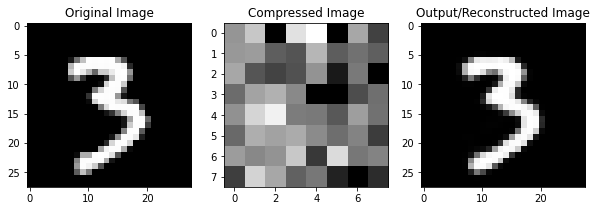

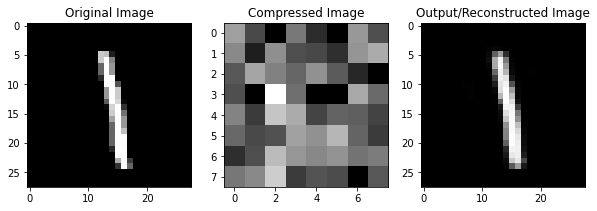

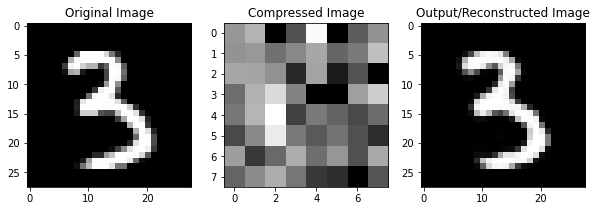

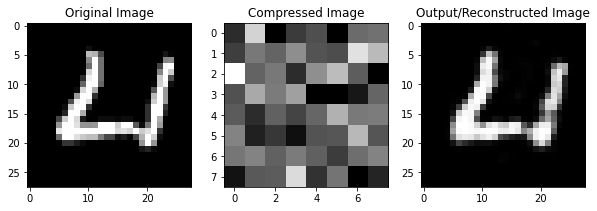

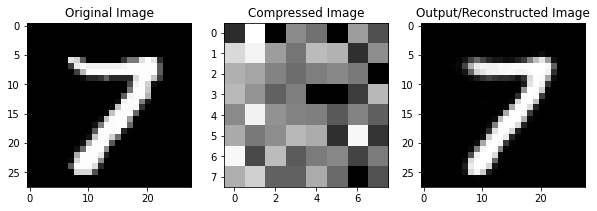

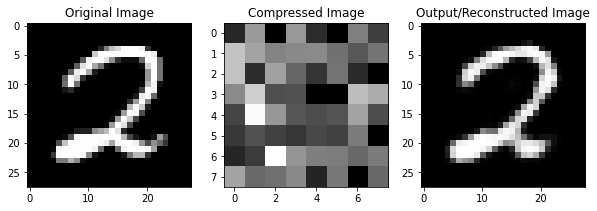

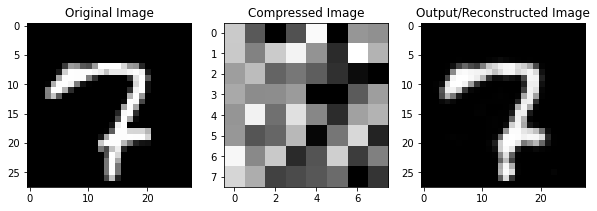

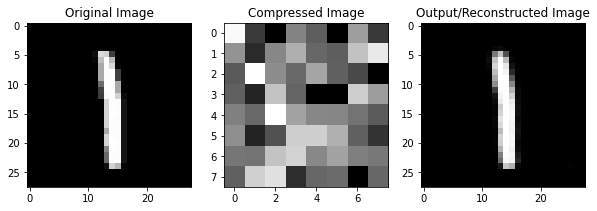

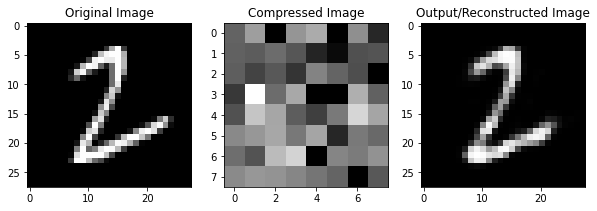

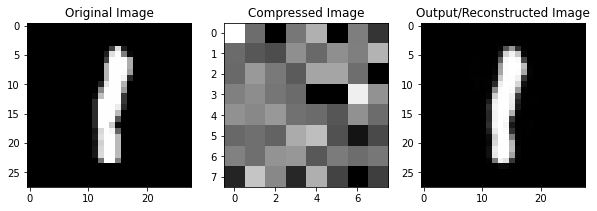

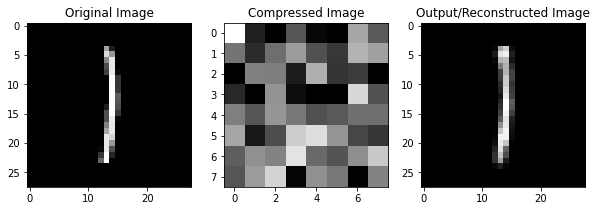

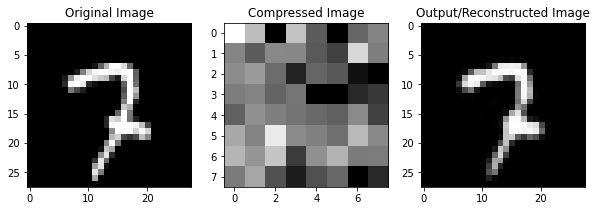

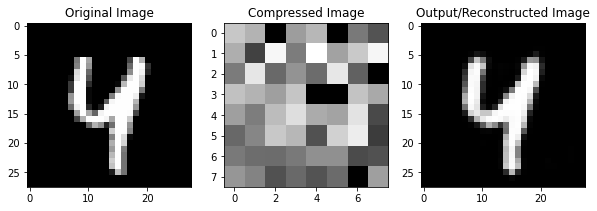

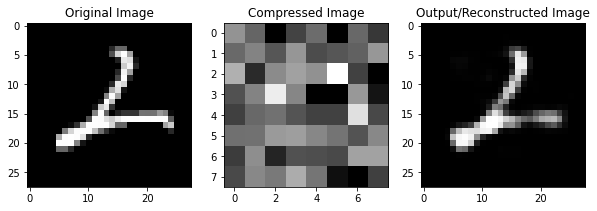

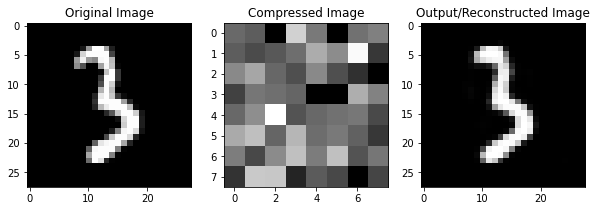

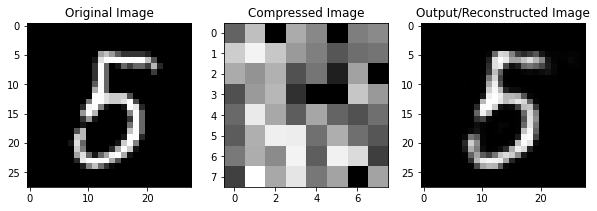

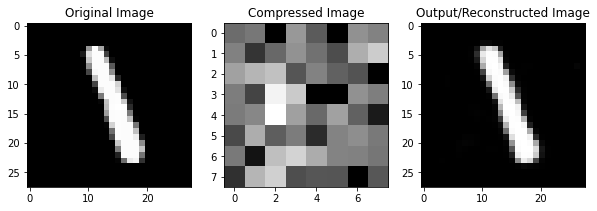

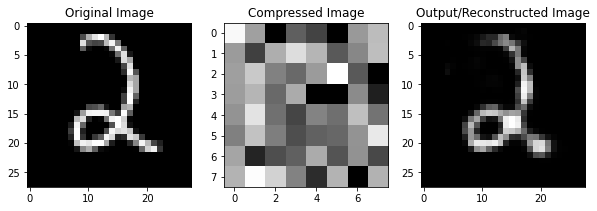

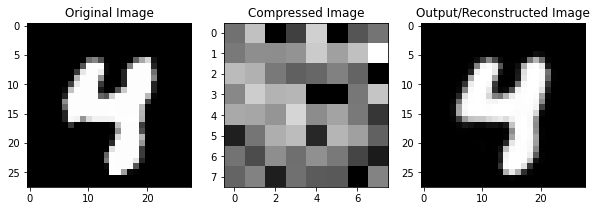

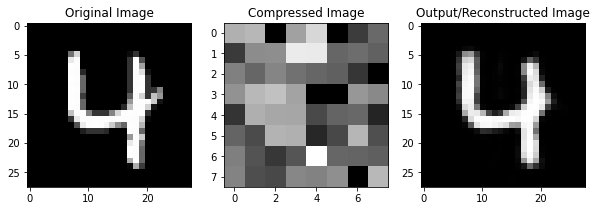

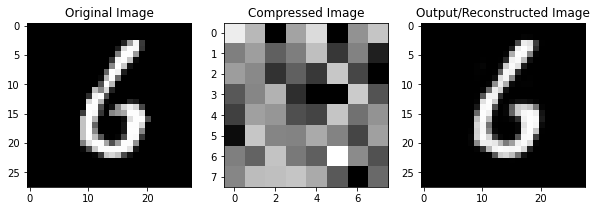

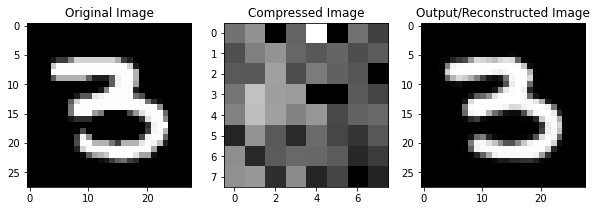

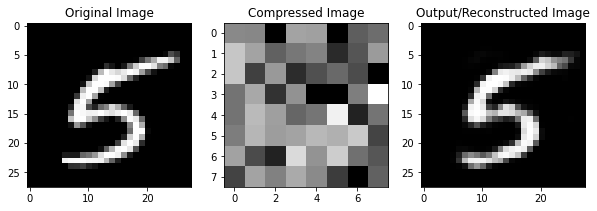

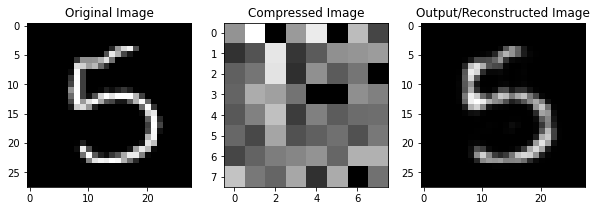

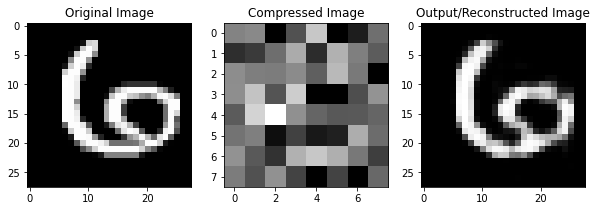

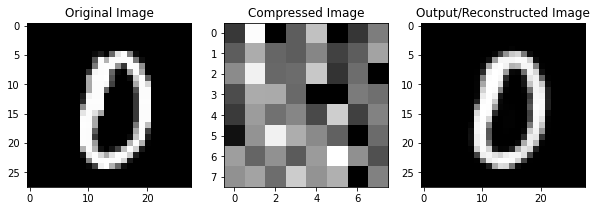

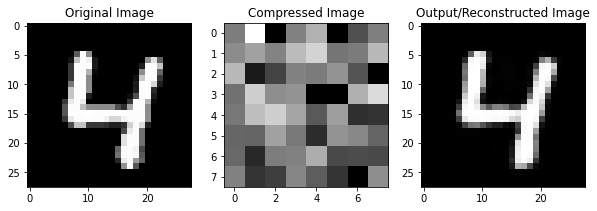

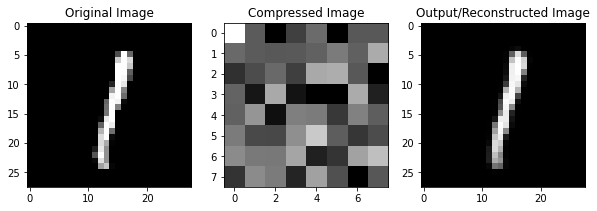

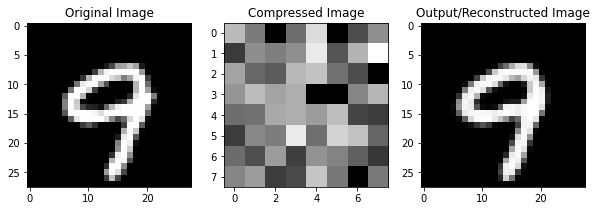

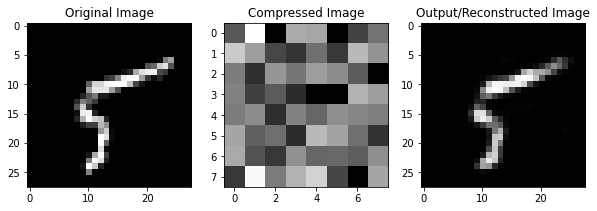

In [ ]:
n = 60
for i in range(30,n):
  plt.figure(figsize=(10,4))
  plt.subplot(131)
  plt.title("Original Image")
  plt.imshow(xtest[i].reshape(28,28), cmap='gray')
  plt.subplot(132)
  plt.title("Compressed Image")
  plt.imshow(encodop[i].reshape(8,8), cmap='gray')
  plt.subplot(133)
  plt.title("Output/Reconstructed Image")
  plt.imshow(prediction[i].reshape(28,28), cmap='gray')
  plt.show()

### Autoencoder untuk denoise image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

In [ ]:
#load dataset mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#scaling image
xtrain = (xtrain - 127.5) / 127.5
xtest = (xtest - 127.5) / 127.5
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#reshaping image to channel format

xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#create layer

input_layer = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(16,(3,3), activation="relu", padding="same", strides=(2,2))(input_layer)
c2 = layers.Conv2D(8,(3,3), activation="relu", padding="same", strides=(2,2))(c1)

c3 = layers.Conv2DTranspose(8,(3,3), activation="relu", padding="same", strides=(2,2))(c2)
c4 = layers.Conv2DTranspose(16,(3,3), activation="relu", padding="same", strides=(2,2))(c3)
output_layer = layers.Conv2D(1,(3,3), activation="tanh", padding="same")(c4)

model = models.Model(input_layer, output_layer)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 1)         145 

In [ ]:
from tensorflow.keras import losses
model.compile(optimizer="adam", loss= losses.MeanSquaredError())

In [ ]:
import tensorflow as tf
noise_factor = 0.4
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,1.0) 
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,1.0)

<function matplotlib.pyplot.show>

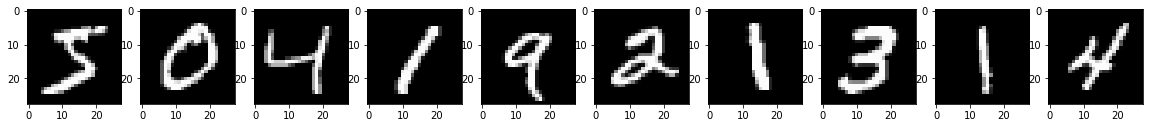

In [ ]:
#Original data

from re import I
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtrain[i]), cmap="gray")
plt.show

<function matplotlib.pyplot.show>

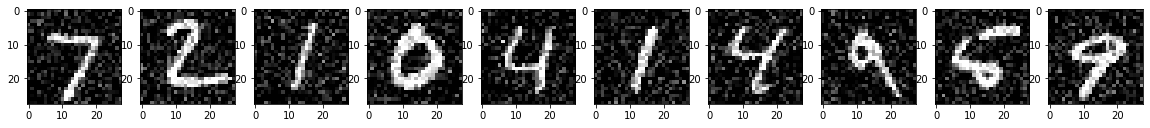

In [ ]:
# Noisy data

from re import I
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtest_noisy[i]), cmap="gray")
plt.show

In [ ]:
model.fit(xtrain_noisy, xtrain, epochs=5, batch_size=1000, shuffle=True, validation_data=(xtest_noisy, xtest))

Epoch 1/5
60/60 [==============================] - 54s 881ms/step - loss: 0.5167 - val_loss: 0.2440
Epoch 2/5
60/60 [==============================] - 53s 882ms/step - loss: 0.1642 - val_loss: 0.0891
Epoch 3/5
60/60 [==============================] - 53s 883ms/step - loss: 0.0662 - val_loss: 0.0493
Epoch 4/5
60/60 [==============================] - 53s 882ms/step - loss: 0.0436 - val_loss: 0.0376
Epoch 5/5
60/60 [==============================] - 53s 884ms/step - loss: 0.0353 - val_loss: 0.0317


In [ ]:
predict = model.predict(xtest_noisy)
predict.shape

(10000, 28, 28, 1)

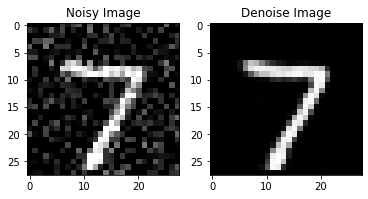

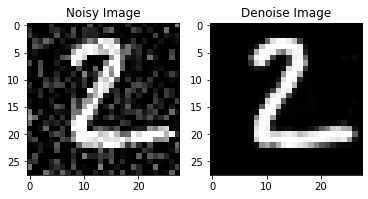

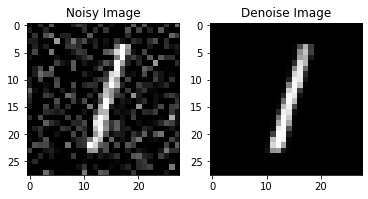

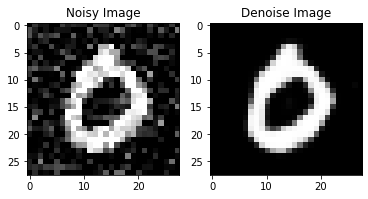

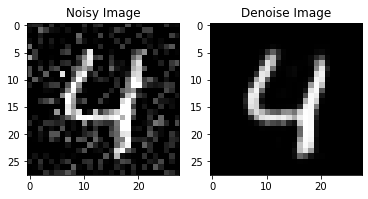

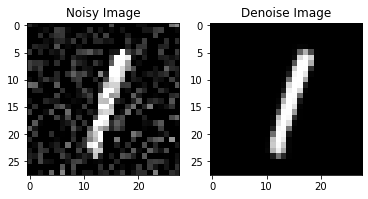

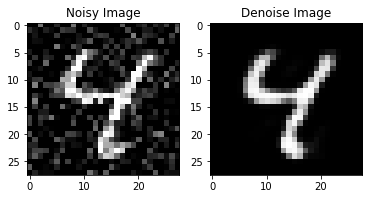

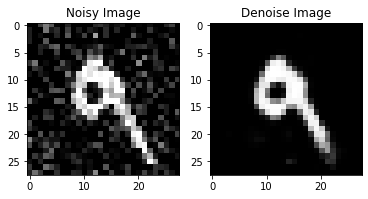

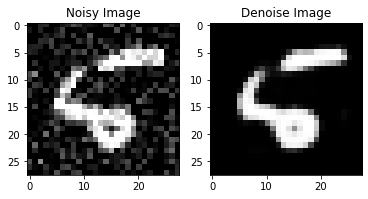

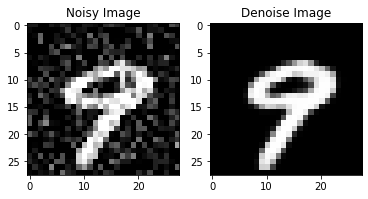

In [ ]:
n = 10
for i in range (n):
  plt.subplot(121)
  plt.title("Noisy Image")
  plt.imshow(tf.squeeze(xtest_noisy[i]), cmap="gray")
  plt.subplot(122)
  plt.title("Denoise Image")
  plt.imshow(prediction[i].reshape(28,28), cmap='gray')
  plt.show()

### Tugas

1. Lakukan scrapping pada search engine/web tertentu (coba cari yang cukup banyak noise untuk data citranya)

2. Lakukan proses image denoising dengan menggunakan auto encoder

Minimal 50 gambar (resolusi minimal 50px*50px)